<a href="https://colab.research.google.com/github/nloncomilla/ghtest/blob/main/Regresion_PITCH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) Cargamos las librerias que se utilizaran en el modelo

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)

2) Subimos la base de datos actualizada en PITCH_LR con los datos hasta la fecha a la carpeta de Archivos en Colab

In [2]:
df = pd.read_csv('./LR_PITCH.csv')
df = df[len(df)-42:] 

In [3]:
df = df.drop('Time',axis=1) 

3) Preparamos las matrices de entrenamiento

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
x=df.drop('Rend',axis=1)
y=df['Rend']

4) Regresion Lineal directa

In [5]:
lm1=LinearRegression()
lm1.fit(x,y)
print(lm1.intercept_)
print(lm1.coef_)

-334.93814712875593
[ 1.15851263  1.07035524 65.99203756 -7.91089054 -5.8215612 ]


5) Regresion con herramienta Split

In [7]:
from sklearn.model_selection import train_test_split
X=df.drop('Rend',axis=1)
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=1)
                                            
lm2=LinearRegression().fit(x_train,y_train)
lm2_pred=lm2.predict(x_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,lm2_pred)))
print("R*2:",r2_score(y_test,lm2_pred))


RMSE: 1.3881524236575815
R*2: 0.5747941767408284


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


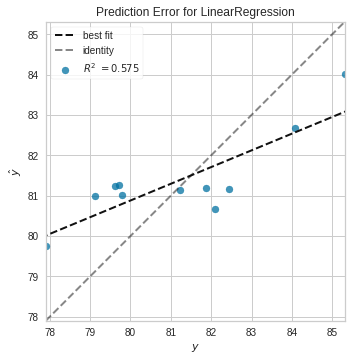

In [8]:
from yellowbrick.regressor import PredictionError,ResidualsPlot
v=PredictionError(lm2).fit(x_train,y_train)
v.score(x_test,y_test)
v.poof()

In [9]:
print(lm2.coef_)
print(lm2.intercept_)

[ 1.13492475  0.97169013 55.94789252 -8.15236876 -5.91805533]
-271.58328729113373


6) Metodo con Interaccion de variables

In [10]:
df['interaction1']=df['Camara']*df['Temp']
df['interaction2']=df['Temp']*df['Reciclo']
df['interaction3']=df['Reciclo']*df['API']
df['interaction5']=df['CCN']*df['Camara']

X=df[['Camara','Temp','Reciclo','API','CCN','interaction1','interaction2','interaction3','interaction5']]
y=df['Rend']
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=1)
                                            
lm3=LinearRegression().fit(x_train,y_train)
lm3_pred=lm3.predict(x_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,lm3_pred)))
print("R*2:",r2_score(y_test,lm3_pred))

RMSE: 1.6596882083338629
R*2: 0.39217590916567757


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


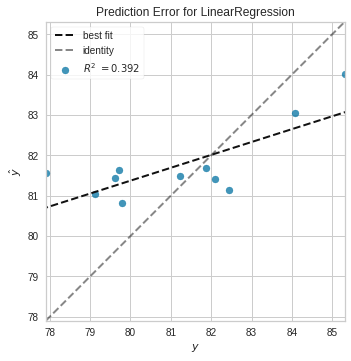

In [11]:
v=PredictionError(lm3).fit(x_train,y_train)
v.score(x_test,y_test)
v.poof()

In [12]:
print(lm3.coef_)
print(lm3.intercept_)

[ 5.16868938e+03 -3.97926887e+01 -2.18256224e+04  1.46929962e+01
 -1.01062697e+00 -1.01987044e+01  4.47224689e+01 -2.10453820e+01
 -6.42150474e+00]
19538.305241652237


7) Ingresar valores actuales del día

In [13]:
a = float(input('Valor Camara_Servicio: '))
b = float(input('Valor Temp Salida: '))
c = float(input('Valor Reciclo: '))
d = float(input('Valor API: '))
e = float(input('Valor CCN: '))

valores = [[a,b,c,d,e]]
valores3 = [[a,b,c,d,e,(a*b),(b*c),(c*d),(e*a)]]

Valor Camara_Servicio: 0.79949
Valor Temp Salida: 494.13
Valor Reciclo: 1.0806
Valor API: 8.4378
Valor CCN: 20.015


8)Predicción del valor diario

In [14]:
predicted1 = lm1.predict(valores)
print(predicted1)

[82.92464505]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [15]:
predicted2 = lm2.predict(valores)
print(predicted2)

[82.68467671]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [16]:
predicted3 = lm3.predict(valores3)
print(predicted3)

[83.04710841]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
